Librerias basicas para manipular datos y dibujar graficos

In [15]:
import pandas as pd  ## Libreria para manipulacion de dataframes (Pandas)
import numpy as np   ##Libreria para hacer operaciones matematicas
import matplotlib.pyplot as plt ##Libreria para dibujar
from statsmodels.iolib.openfile import get_file_obj
import seaborn as sns    ##Libreria para dibujar mas bonito
import pickle as pickle    ## Libreria para guardar objetos y poder utilizarlos si necesidad de volver a calcular el modelo
import matplotlib ##

Librerias del modelo

In [16]:
from sklearn.cluster import KMeans #libreria del modelo
from sklearn.preprocessing import MinMaxScaler #libreria para escalar datos numericos

Cargar los datos

In [17]:
filepath = "./" #ruta del archivo
file = "datos.xlsx" #nombre del archivo
df = pd.read_excel(filepath + file) #cargamos los datos
df

,Regional,Sexo_Desc,Edad
0,EJE CAFETERO,Masculino,51.0
1,ANTIOQUIA,Femenino,58.0
2,ANTIOQUIA,Masculino,79.0
3,EJE CAFETERO,Masculino,59.0
4,CENTRO,Masculino,52.0
...,...,...,...
4971,EJE CAFETERO,Masculino,36.0
4972,ANTIOQUIA,Masculino,47.0
4973,EJE CAFETERO,Masculino,41.0
4974,ANTIOQUIA,Femenino,55.0


Transformacion de datos


In [18]:
################ Convertir el sexo en dummie
sexo_list = ['Masculino','Femenino'] #definimos las categorias iguales a las de los datos
Sexo_ohc = pd.get_dummies(df.Sexo_Desc)  #la columna sexo_desc la convirtio en dos columnas (femenino/masculino)
df = pd.concat([df, Sexo_ohc], axis = 1) #agregamos esas dos nuevas columnas a los datos
df

,Regional,Sexo_Desc,Edad,Femenino,Masculino
0,EJE CAFETERO,Masculino,51.0,0,1
1,ANTIOQUIA,Femenino,58.0,1,0
2,ANTIOQUIA,Masculino,79.0,0,1
3,EJE CAFETERO,Masculino,59.0,0,1
4,CENTRO,Masculino,52.0,0,1
...,...,...,...,...,...
4971,EJE CAFETERO,Masculino,36.0,0,1
4972,ANTIOQUIA,Masculino,47.0,0,1
4973,EJE CAFETERO,Masculino,41.0,0,1
4974,ANTIOQUIA,Femenino,55.0,1,0


In [19]:
################ Convertir el sexo en dummie
Regional_list = ['ANTIOQUIA','OCCIDENTE','CENTRO','EJE CAFETERO','NORTE'] #definimos las categorias iguales a las de los datos
Regional_ohc = pd.get_dummies(df.Regional)  #la columna sexo_desc la convirtio en dos columnas (femenino/masculino)
df = pd.concat([df, Regional_ohc], axis = 1) #agregamos esas dos nuevas columnas a los datos
df

,Regional,Sexo_Desc,Edad,Femenino,Masculino,ANTIOQUIA,CENTRO,EJE CAFETERO,NORTE,OCCIDENTE
0,EJE CAFETERO,Masculino,51.0,0,1,0,0,1,0,0
1,ANTIOQUIA,Femenino,58.0,1,0,1,0,0,0,0
2,ANTIOQUIA,Masculino,79.0,0,1,1,0,0,0,0
3,EJE CAFETERO,Masculino,59.0,0,1,0,0,1,0,0
4,CENTRO,Masculino,52.0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4971,EJE CAFETERO,Masculino,36.0,0,1,0,0,1,0,0
4972,ANTIOQUIA,Masculino,47.0,0,1,1,0,0,0,0
4973,EJE CAFETERO,Masculino,41.0,0,1,0,0,1,0,0
4974,ANTIOQUIA,Femenino,55.0,1,0,1,0,0,0,0


In [20]:
################ escalamos la edad para que todas las variables esten entre 0 y 1
scaler = MinMaxScaler()
scaler.fit(df.Edad.values.reshape(-1,1))
Edad_Escalada = scaler.transform(df.Edad.values.reshape(-1,1))
df['Edad_Escalada'] = Edad_Escalada
df

,Regional,Sexo_Desc,Edad,Femenino,Masculino,ANTIOQUIA,CENTRO,EJE CAFETERO,NORTE,OCCIDENTE,Edad_Escalada
0,EJE CAFETERO,Masculino,51.0,0,1,0,0,1,0,0,0.645570
1,ANTIOQUIA,Femenino,58.0,1,0,1,0,0,0,0,0.734177
2,ANTIOQUIA,Masculino,79.0,0,1,1,0,0,0,0,1.000000
3,EJE CAFETERO,Masculino,59.0,0,1,0,0,1,0,0,0.746835
4,CENTRO,Masculino,52.0,0,1,0,1,0,0,0,0.658228
...,...,...,...,...,...,...,...,...,...,...,...
4971,EJE CAFETERO,Masculino,36.0,0,1,0,0,1,0,0,0.455696
4972,ANTIOQUIA,Masculino,47.0,0,1,1,0,0,0,0,0.594937
4973,EJE CAFETERO,Masculino,41.0,0,1,0,0,1,0,0,0.518987
4974,ANTIOQUIA,Femenino,55.0,1,0,1,0,0,0,0,0.696203


Aplicar el modelo

In [21]:
################ filtramos las variables de las cuales va aprender el modelo
filtro_variables = ['Femenino',
                   'Masculino',
                   'ANTIOQUIA',
                   'CENTRO',
                   'EJE CAFETERO',
                   'NORTE',
                   'OCCIDENTE',
                   'Edad_Escalada']

df_kmeans = df[filtro_variables]
df_kmeans

,Femenino,Masculino,ANTIOQUIA,CENTRO,EJE CAFETERO,NORTE,OCCIDENTE,Edad_Escalada
0,0,1,0,0,1,0,0,0.645570
1,1,0,1,0,0,0,0,0.734177
2,0,1,1,0,0,0,0,1.000000
3,0,1,0,0,1,0,0,0.746835
4,0,1,0,1,0,0,0,0.658228
...,...,...,...,...,...,...,...,...
4971,0,1,0,0,1,0,0,0.455696
4972,0,1,1,0,0,0,0,0.594937
4973,0,1,0,0,1,0,0,0.518987
4974,1,0,1,0,0,0,0,0.696203


In [22]:
################ corremos el modelo de k-means utilizando diferentes valores de k (entre 2 y 25) y guardamos kmeans_loss_ los valores para pintar el grafico de codo
clusters = np.arange(2, 25)
kmeans_loss_ = []

for k in clusters:
  modelo_kmeans = KMeans(n_clusters = k)
  modelo_kmeans.fit_predict(df_kmeans)       
  kmeans_loss_.append(modelo_kmeans.inertia_)    
  print("Running k = " + str(k))

Running k = 2
Running k = 3
Running k = 4
Running k = 5
Running k = 6
Running k = 7
Running k = 8
Running k = 9
Running k = 10
Running k = 11
Running k = 12
Running k = 13
Running k = 14
Running k = 15
Running k = 16
Running k = 17
Running k = 18
Running k = 19
Running k = 20
Running k = 21
Running k = 22
Running k = 23
Running k = 24


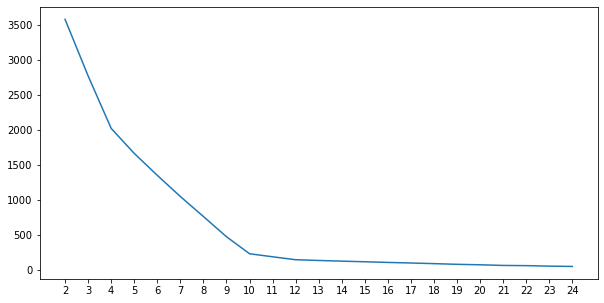

In [23]:
################ pintamos el grafico del codo y decidimos trabajar con k = 10
plt.figure(figsize = (10, 5))
ax = sns.lineplot(x = clusters, y = kmeans_loss_)
ax.set_xticks(clusters)
plt.show();

In [24]:
################ ahora corremos el modelo con el k que definimos en le grafico anterior y agregamos una columna *cluster* al df origninal, para marcar cada registro a que cluster pertenece
modelo_kmeans = KMeans(n_clusters = 10) #entrenamos el modelo con k = 10
cluster = modelo_kmeans.fit_predict(df_kmeans) #creamos la columna cluster que indica a que cluster pertenece cada registro
df['cluster']  = cluster #agregamos la columna cluster al dataframe original
df

,Regional,Sexo_Desc,Edad,Femenino,Masculino,ANTIOQUIA,CENTRO,EJE CAFETERO,NORTE,OCCIDENTE,Edad_Escalada,cluster
0,EJE CAFETERO,Masculino,51.0,0,1,0,0,1,0,0,0.645570,8
1,ANTIOQUIA,Femenino,58.0,1,0,1,0,0,0,0,0.734177,0
2,ANTIOQUIA,Masculino,79.0,0,1,1,0,0,0,0,1.000000,1
3,EJE CAFETERO,Masculino,59.0,0,1,0,0,1,0,0,0.746835,8
4,CENTRO,Masculino,52.0,0,1,0,1,0,0,0,0.658228,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4971,EJE CAFETERO,Masculino,36.0,0,1,0,0,1,0,0,0.455696,8
4972,ANTIOQUIA,Masculino,47.0,0,1,1,0,0,0,0,0.594937,1
4973,EJE CAFETERO,Masculino,41.0,0,1,0,0,1,0,0,0.518987,8
4974,ANTIOQUIA,Femenino,55.0,1,0,1,0,0,0,0,0.696203,0


In [25]:
################ sacamos la descripcion de los cluster (centroides)
centroides = pd.DataFrame(modelo_kmeans.cluster_centers_.round(4),columns=filtro_variables)
centroides

,Femenino,Masculino,ANTIOQUIA,CENTRO,EJE CAFETERO,NORTE,OCCIDENTE,Edad_Escalada
0,1.0,0.0,1.0,-0.0,0.0,0.0,-0.0,0.5425
1,-0.0,1.0,1.0,0.0,0.0,0.0,-0.0,0.5604
2,0.0,1.0,0.0,1.0,0.0,-0.0,-0.0,0.5713
3,0.0,1.0,0.0,-0.0,0.0,1.0,0.0,0.5513
4,1.0,0.0,0.0,1.0,0.0,-0.0,0.0,0.5537
5,1.0,0.0,0.0,-0.0,0.0,-0.0,1.0,0.5661
6,0.0,1.0,0.0,-0.0,-0.0,-0.0,1.0,0.5339
7,1.0,0.0,0.0,-0.0,1.0,-0.0,-0.0,0.5737
8,0.0,1.0,0.0,-0.0,1.0,0.0,-0.0,0.5845
9,1.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0,0.5456


In [26]:
################ convertimos la edad a su valor real para poder interpretar
centroides['Edad'] = scaler.inverse_transform(centroides.Edad_Escalada.values.reshape(-1,1))
centroides

###### ejemplos de interpretacion
#   Cluster 0
#   Sexo = Femenino
#   Regional = Antioquia
#   Edad promedio = 42.8 años

#   Cluster 4
#   Sexo = Masculino
#   Regional = Centro
#   Edad promedio = 45.1 años

,Femenino,Masculino,ANTIOQUIA,CENTRO,EJE CAFETERO,NORTE,OCCIDENTE,Edad_Escalada,Edad
0,1.0,0.0,1.0,-0.0,0.0,0.0,-0.0,0.5425,42.8575
1,-0.0,1.0,1.0,0.0,0.0,0.0,-0.0,0.5604,44.2716
2,0.0,1.0,0.0,1.0,0.0,-0.0,-0.0,0.5713,45.1327
3,0.0,1.0,0.0,-0.0,0.0,1.0,0.0,0.5513,43.5527
4,1.0,0.0,0.0,1.0,0.0,-0.0,0.0,0.5537,43.7423
5,1.0,0.0,0.0,-0.0,0.0,-0.0,1.0,0.5661,44.7219
6,0.0,1.0,0.0,-0.0,-0.0,-0.0,1.0,0.5339,42.1781
7,1.0,0.0,0.0,-0.0,1.0,-0.0,-0.0,0.5737,45.3223
8,0.0,1.0,0.0,-0.0,1.0,0.0,-0.0,0.5845,46.1755
9,1.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0,0.5456,43.1024


In [27]:
################ guardamos la informacion resultante
df.to_excel(filepath + "datos_cluster.xlsx",index=False) #guardamos el excel con los datos y el cluster
centroides.to_excel(filepath + "centroides.xlsx") #guardamos el excel con los datos y el cluster

In [28]:
################ guardamos el modelo, para poder llevarlo a pdn y poder clusterizar nueva poblacion
with get_file_obj(filepath + "modelo_kmeans", 'wb') as fout:
  pickle.dump(modelo_kmeans, fout, protocol=-1)

In [29]:
################ ejemplo de como cargar el modelo
with get_file_obj(filepath + "modelo_kmeans", 'rb') as fin:
  pickle.load(fin)
modelo_kmeans.cluster_centers_.round(2)

array([[ 1.  ,  0.  ,  1.  , -0.  ,  0.  ,  0.  , -0.  ,  0.54],
       [-0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  , -0.  ,  0.56],
       [ 0.  ,  1.  ,  0.  ,  1.  ,  0.  , -0.  , -0.  ,  0.57],
       [ 0.  ,  1.  ,  0.  , -0.  ,  0.  ,  1.  ,  0.  ,  0.55],
       [ 1.  ,  0.  ,  0.  ,  1.  ,  0.  , -0.  ,  0.  ,  0.55],
       [ 1.  ,  0.  ,  0.  , -0.  ,  0.  , -0.  ,  1.  ,  0.57],
       [ 0.  ,  1.  ,  0.  , -0.  , -0.  , -0.  ,  1.  ,  0.53],
       [ 1.  ,  0.  ,  0.  , -0.  ,  1.  , -0.  , -0.  ,  0.57],
       [ 0.  ,  1.  ,  0.  , -0.  ,  1.  ,  0.  , -0.  ,  0.58],
       [ 1.  , -0.  , -0.  , -0.  ,  0.  ,  1.  , -0.  ,  0.55]])